In [61]:
import nilearn

from nilearn import image
import nibabel as nib
import copy
from nilearn import plotting
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
from math import ceil
from nilearn.datasets import MNI152_FILE_PATH
from sklearn.model_selection import train_test_split
from nibabel.affines import apply_affine
from nilearn.image.resampling import coord_transform, get_bounds, get_mask_bounds
from nilearn.image import resample_img
from nilearn.masking import compute_background_mask
from nilearn.masking import compute_epi_mask
import metric_util as mt
import data_util as du
import mri_draw_utils as mrd
import ellipsoid_masker as elpm
import ellipsoid_mask as em
import traceback
import random
import itertools
from random import seed
from random import sample
from nilearn.image import math_img
import tensor_util as tu
np.random.seed(0)

In [32]:
subject_scan_path = du.get_full_path_subject1()

In [33]:
def create_frames(total_scans, start_n, size):

    scans = {}     
    print ("total_scans: " + str(total_scans))
    print ("size: " + str(size))
    count = 0
    for ts in range(size):
        scans[count] = start_n + ts
        print ("Adding sequential frames: " + str("; Timepoint #: ") + str(ts))
        count = count + 1

    return scans

In [34]:
def generate_structural_missing_pattern(frames_count, start_n, shape):

    subject_scan_path = du.get_full_path_subject1()

    subj_img  = mt.read_image_abs_path(subject_scan_path)
    mask_img = compute_epi_mask(subject_scan_path)

    mask_img_data = np.array(mask_img.get_data())
    epi_mask = copy.deepcopy(mask_img_data);
    n = 0
    
    corrupted_volumes = {}
    corrupted_volumes_list = []
    corrupted_volumes_list_scan_numbers = []
    ts = create_frames(shape[len(shape) - 1], start_n, frames_count)

    for i in ts:
        target_img = image.index_img(subject_scan_path,ts[i])
        data = copy.deepcopy(target_img.get_data())
        data[epi_mask == 1] = 0
        masked_image = mt.reconstruct_image_affine(subj_img, data)
        corrupted_volumes_list.append(masked_image)
        corrupted_volumes[ts[i]] = masked_image
        corrupted_volumes_list_scan_numbers.append(ts[i])

    counter = 0
    

    volumes_list = []

    counter = 0
    
    volumes_list = []
    for img in image.iter_img(subject_scan_path):
        print "Volume Index: " + str(counter)
        if counter in corrupted_volumes_list_scan_numbers:
            print "Adding corrupted volume to the list " + str(counter)
            volumes_list.append(corrupted_volumes[counter])
        else:
            print "Adding normal volume to the list " + str(counter)
            volumes_list.append(img)
        counter = counter + 1       

    # now generate corrupted 4D from the list
    print("I am here")
    x_corr_img = image.concat_imgs(volumes_list)
    print("I am here 2")
    #observed_ratio = mt.compute_observed_ratio(image_masked_by_ellipsoid)
    #print ("Effective Missing Ratio: " + str(observed_ratio))
    return x_corr_img, ts

In [60]:
x_true_img  = mt.read_image_abs_path(subject_scan_path)

In [35]:
x_mask_img, random_ts = generate_structural_missing_pattern(5, 45,[53, 63, 46, 144])

total_scans: 144
size: 5
Adding sequential frames: ; Timepoint #: 0
Adding sequential frames: ; Timepoint #: 1
Adding sequential frames: ; Timepoint #: 2
Adding sequential frames: ; Timepoint #: 3
Adding sequential frames: ; Timepoint #: 4
Volume Index: 0
Adding normal volume to the list 0
Volume Index: 1
Adding normal volume to the list 1
Volume Index: 2
Adding normal volume to the list 2
Volume Index: 3
Adding normal volume to the list 3
Volume Index: 4
Adding normal volume to the list 4
Volume Index: 5
Adding normal volume to the list 5
Volume Index: 6
Adding normal volume to the list 6
Volume Index: 7
Adding normal volume to the list 7
Volume Index: 8
Adding normal volume to the list 8
Volume Index: 9
Adding normal volume to the list 9
Volume Index: 10
Adding normal volume to the list 10
Volume Index: 11
Adding normal volume to the list 11
Volume Index: 12
Adding normal volume to the list 12
Volume Index: 13
Adding normal volume to the list 13
Volume Index: 14
Adding normal volume 

In [36]:
random_ts

{0: 45, 1: 46, 2: 47, 3: 48, 4: 49}

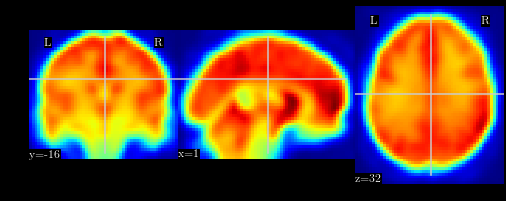

In [37]:
x_miss_image = plotting.plot_epi(image.index_img(x_mask_img, 50), bg_img=None,black_bg=True, cmap='jet') 

In [38]:
subject_scan_path = du.get_full_path_subject1()

In [39]:
 mask_img = compute_epi_mask(subject_scan_path)

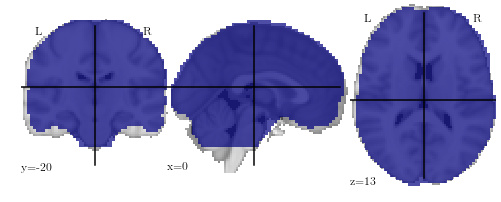

In [40]:
from nilearn.plotting import plot_roi
plotting.plot_roi(mask_img)

In [41]:
mask_img_data = np.array(mask_img.get_data())

In [42]:
mask_img_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

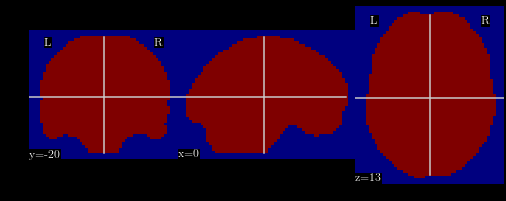

In [43]:
plotting.plot_epi(mask_img, bg_img=None,black_bg=True, cmap='jet')

In [44]:
x_true_img = mt.read_image_abs_path(subject_scan_path)



In [45]:
mean_img = image.mean_img(x_mask_img)

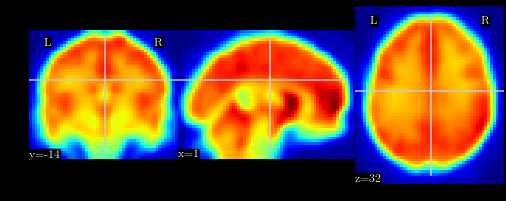

In [46]:
plotting.plot_epi(mean_img, bg_img=None,black_bg=True, cmap='jet')

In [47]:
mean_img

In [48]:
print mean_img

<class 'nibabel.nifti1.Nifti1Image'>
data shape (53, 63, 46)
affine: 
[[  -3.    0.    0.   78.]
 [   0.    3.    0. -111.]
 [   0.    0.    3.  -51.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [ 3 53 63 46  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b    

In [49]:
mean_img = image.mean_img(x_true_img)

In [50]:
print mean_img

<class 'nibabel.nifti1.Nifti1Image'>
data shape (53, 63, 46)
affine: 
[[  -3.    0.    0.   78.]
 [   0.    3.    0. -111.]
 [   0.    0.    3.  -51.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [ 3 53 63 46  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b    

In [51]:
print x_miss_image

In [52]:
mean_img.get_data().shape

(53, 63, 46)

In [53]:
z_scored_image = math_img("np.mean(yt)", yt=x_mask_img)

In [54]:
print z_scored_image

<class 'nibabel.nifti1.Nifti1Image'>
data shape ()
affine: 
[[  -3.    0.    0.   78.]
 [   0.    3.    0. -111.]
 [   0.    0.    3.  -51.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [0 1 1 1 1 1 1 1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c

In [55]:
print z_scored_image

<class 'nibabel.nifti1.Nifti1Image'>
data shape ()
affine: 
[[  -3.    0.    0.   78.]
 [   0.    3.    0. -111.]
 [   0.    0.    3.  -51.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [0 1 1 1 1 1 1 1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c

In [ ]:
img = image.index_img(masked_image_data, 46) = image.index_img(masked_image_data, 51)

In [ ]:
mean_img = math_img("(np.mean(yt))", yt=self.x_miss_img)
mean_img_data = np.array(mean_img.get_data())

In [ ]:
img = image.index_img(masked_image_data, 46)

In [ ]:
img = image.index_img(masked_image_data, 51)

In [ ]:
plotting.plot_epi(img, bg_img=None,black_bg=True, cmap='jet')

In [ ]:
def init_mean(x, ts):
        
        mean_img = image.mean_img(x)
        corrupted_volumes_list_scan_numbers = []
        replaced_frames = {}
        
        for i in ts:
            mean_frame = mean_img
            replaced_frames[i] = mean_frame
            print "Corrupted Frame: " + str(ts[i])
            corrupted_volumes_list_scan_numbers.append(ts[i])
        
        counter = 0    
        volumes_list = []
        for img in image.iter_img(x):
            print "Volume Index: " + str(counter)
            if counter in corrupted_volumes_list_scan_numbers:
                print "Adding mean img to the list " + str(counter)
                volumes_list.append(mean_img)
            else:
                print "Adding normal volume to the list " + str(counter)
                volumes_list.append(img)
            counter = counter + 1
        
        x_init_img = image.concat_imgs(volumes_list)
        return x_init_img

In [ ]:
updated_volume = init_mean(x_mask_img, random_ts)

In [ ]:
x_miss_image_45 = plotting.plot_epi(image.index_img(updated_volume, 49), bg_img=None,black_bg=True, cmap='jet') 

In [ ]:
total_time = 144
tr=2

In [ ]:
timepoints = list(range(0, total_time, int(tr)))

In [ ]:
timepoints

In [ ]:
stimfunc = np.zeros((int(total_time / tr), 1))

In [ ]:
stimfunc

In [ ]:
stimfunc[np.random.randint(0, int(total_time / tr), 1)] = 1

In [ ]:
stimfunc.shape

In [ ]:
stimfunc

In [ ]:
from scipy import stats
def _generate_noise_temporal_task(stimfunction_tr,
                                  motion_noise='gaussian',
                                  ):
    """Generate the signal dependent noise
    Create noise specific to the signal, for instance there is variability
    in how the signal manifests on each event
    Parameters
    ----------
    stimfunction_tr : 1 Dimensional array
        This is the timecourse of the stimuli in this experiment,
        each element represents a TR
    motion_noise : str
        What type of noise will you generate? Can be gaussian or rician
    Returns
    ----------
    noise_task : one dimensional array, float
        Generates the temporal task noise timecourse
    """

    # Make the noise to be added
    stimfunction_tr = stimfunction_tr != 0
    if motion_noise == 'gaussian':
        noise = stimfunction_tr * np.random.normal(0, 1,
                                                   size=stimfunction_tr.shape)
    elif motion_noise == 'rician':
        noise = stimfunction_tr * stats.rice.rvs(0, 1,
                                                 size=stimfunction_tr.shape)

    noise_task = stimfunction_tr + noise

    # Normalize
    noise_task = stats.zscore(noise_task).flatten()

    return noise_task

In [ ]:
task = _generate_noise_temporal_task(stimfunc)

In [ ]:
plt.plot(task)
plt.axis('off')
plt.xlabel('Task')

In [ ]:
task.shape

In [ ]:
import noise_util as nu
import spike_detection as sp

In [102]:
#x_true, x_truth_norm = tu.normalize_data(np.array(x_true_img.get_data()))
#x_true_img = mt.reconstruct_image_affine(x_true_img, x_true)
x_true_img = mt.read_image_abs_path(subject_scan_path)
x_true_img_path = "/work/scratch/tensor_completion/4D/noise/45/x_true_img.nii"
nib.save(x_true_img,x_true_img_path)

In [185]:
img45 = image.index_img(x_true_img, 45)

In [183]:
im45noised = nu.add_richian_noise(img45, np.array(img45.get_data()), 40)
im45noised_img = mt.reconstruct_image_affine(x_true_img, im45noised)
img45path = "/work/scratch/tensor_completion/4D/noise/45/im45noised.nii"
nib.save(im45noised_img,img45path)

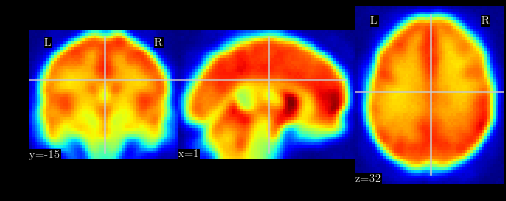

In [184]:
im45noised_45 = plotting.plot_epi(im45noised_img, bg_img=None,black_bg=True, cmap='jet') 

In [88]:
def update_volume(x_img4d, x_img3d, scan_number):
        
        corrupted_volumes_list_scan_numbers = []
        replaced_frames = {}
        
        counter = 0    
        volumes_list = []
        for img in image.iter_img(x_img4d):
            print "Volume Index: " + str(counter)
            if counter == scan_number:
                print "Adding corrupted volume to the list " + str(counter)
                volumes_list.append(x_img3d)
            else:
                print "Adding normal volume to the list " + str(counter)
                volumes_list.append(img)
            counter = counter + 1
        
        x_img = image.concat_imgs(volumes_list)
        return x_img

In [76]:
folder = "/work/scratch/tensor_completion/4D/noise/45/spikes"

In [97]:
sp.slice_wise_fft(subject_scan_path, folder, spike_thres=4.)

((39, 18), 12)
((64, 18), 14)
((125, 6), 56)
((125, 7), 364)
((125, 8), 284)
((129, 15), 20)


(6,
 '/work/scratch/tensor_completion/4D/noise/45/spikes/subject_spikes.tsv',
 '/apps/git/python/tt-slice/src/subject_zsfft.nii.gz',
 [(39, 18, 12),
  (64, 18, 14),
  (125, 6, 56),
  (125, 7, 364),
  (125, 8, 284),
  (129, 15, 20)])

In [200]:
x_true_updated = update_volume(x_true_img, mask45_img, 45)
x_true_updatedpath = "/work/scratch/tensor_completion/4D/noise/45/x_true_updated_noised.nii"
nib.save(x_true_updated,x_true_updatedpath)

Volume Index: 0
Adding normal volume to the list 0
Volume Index: 1
Adding normal volume to the list 1
Volume Index: 2
Adding normal volume to the list 2
Volume Index: 3
Adding normal volume to the list 3
Volume Index: 4
Adding normal volume to the list 4
Volume Index: 5
Adding normal volume to the list 5
Volume Index: 6
Adding normal volume to the list 6
Volume Index: 7
Adding normal volume to the list 7
Volume Index: 8
Adding normal volume to the list 8
Volume Index: 9
Adding normal volume to the list 9
Volume Index: 10
Adding normal volume to the list 10
Volume Index: 11
Adding normal volume to the list 11
Volume Index: 12
Adding normal volume to the list 12
Volume Index: 13
Adding normal volume to the list 13
Volume Index: 14
Adding normal volume to the list 14
Volume Index: 15
Adding normal volume to the list 15
Volume Index: 16
Adding normal volume to the list 16
Volume Index: 17
Adding normal volume to the list 17
Volume Index: 18
Adding normal volume to the list 18
Volume Index:

In [ ]:
sp.slice_wise_fft(x_true_img_path, folder, spike_thres=4.)

In [201]:
sp.slice_wise_fft(x_true_updatedpath, folder, spike_thres=4.)

((45, 17), 23)
((45, 18), 31)
((64, 18), 14)
((89, 18), 11)
((125, 6), 56)
((125, 7), 364)
((125, 8), 284)
((129, 15), 20)


(8,
 '/work/scratch/tensor_completion/4D/noise/45/spikes/subject_spikes.tsv',
 '/apps/git/python/tt-slice/src/subject_zsfft.nii.gz',
 [(45, 17, 23),
  (45, 18, 31),
  (64, 18, 14),
  (89, 18, 11),
  (125, 6, 56),
  (125, 7, 364),
  (125, 8, 284),
  (129, 15, 20)])

In [ ]:
sp.slice_wise_fft(subject_scan_path, folder, spike_thres=4.)

In [131]:
im45noised = nu.add_richian_noise(img45, np.array(img45.get_data()), 30)

In [166]:
im45noised[:,:,16] = 0

In [163]:
im45noised_img = mt.reconstruct_image_affine(x_true_img, im45noised)

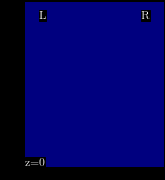

In [165]:
im45noised_45 = plotting.plot_epi(im45noised_img, bg_img=None,black_bg=True, cmap='jet', display_mode='z', cut_coords=[0]) 

In [129]:
im45noised[:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
def get_xyz(i, j, k, epi_img):
    M = epi_img.affine[:3, :3]
    abc = epi_img.affine[:3, 3]
    return M.dot([i, j, k]) + abc

In [152]:
def get_ijk(x, y, z, epi_img):
    M = epi_img.affine[:3, :3]
    abc = epi_img.affine[:3, 3]
    invM = np.linalg.inv(M)
    return invM.dot([x, y, z]) - abc

In [153]:
get_ijk(1, 1, 0, x_true_img)

array([-78.33333333, 111.33333333,  51.        ])

In [198]:
get_xyz(0, 26, 21, x_true_img)

array([ 78., -33.,  12.])

In [191]:
img45 = image.index_img(x_true_img, 45)
mask45 = np.array(img45.get_data())

In [192]:
mask45[:, :, 17] = 0
mask45[:, :, 18] = 0
mask45[:, :, 19] = 0
mask45[:, :, 20] = 0
mask45[:, :, 21] = 0
mask45[:, :, 22] = 0

In [193]:
mask45_img = mt.reconstruct_image_affine(x_true_img, mask45)

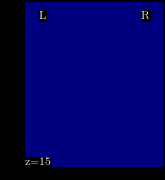

In [199]:
 plotting.plot_epi(mask45_img, bg_img=None,black_bg=True, cmap='jet', display_mode='z', cut_coords=[15]) 

In [202]:
mask_indices = np.ones_like(np.array(x_true_updated.get_data()))

In [203]:
masked_data = x_true_updated.get_data()

In [204]:
mask_indices[masked_data==0] = 0

In [206]:
np.count_nonzero(mask_indices==0)

20034

In [208]:
mask_indices_img = mt.reconstruct_image_affine(x_true_img, mask_indices)
mask_path = "/work/scratch/tensor_completion/4D/mask/mask.nii"
nib.save(mask_indices_img,mask_path)